# HOMEWORK 2 - THEODOROS PATEROS (G40734847)

Import necessary libraries

In [4]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


Load data and set the parameters

In [5]:
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Generate the model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Train the model

In [8]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

Using real-time data augmentation.


/var/folders/px/m2vm_qc55yd4gkdnl89j1phc0000gn/T/ipykernel_21556/1491166128.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10


2023-10-23 09:21:35.040389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


98/98 [==============================] - 115s 1s/step - loss: 2.1243 - accuracy: 0.2114 - val_loss: 1.9649 - val_accuracy: 0.3125
Epoch 2/10
98/98 [==============================] - 121s 1s/step - loss: 1.9365 - accuracy: 0.2991 - val_loss: 1.8030 - val_accuracy: 0.3695
Epoch 3/10
98/98 [==============================] - 113s 1s/step - loss: 1.8293 - accuracy: 0.3372 - val_loss: 1.7257 - val_accuracy: 0.3865
Epoch 4/10
98/98 [==============================] - 113s 1s/step - loss: 1.7647 - accuracy: 0.3594 - val_loss: 1.6398 - val_accuracy: 0.4166
Epoch 5/10
98/98 [==============================] - 130s 1s/step - loss: 1.7224 - accuracy: 0.3775 - val_loss: 1.6164 - val_accuracy: 0.4154
Epoch 6/10
98/98 [==============================] - 135s 1s/step - loss: 1.6808 - accuracy: 0.3893 - val_loss: 1.5799 - val_accuracy: 0.4270
Epoch 7/10
98/98 [==============================] - 133s 1s/step - loss: 1.6463 - accuracy: 0.4016 - val_loss: 1.5089 - val_accuracy: 0.4574
Epoch 8/10
98/98 [======

Save model and weights

In [9]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/paterosthodoris/Desktop/MSBA/MSBA_FALL_2023/STAT_6289/saved_models/keras_cifar10_trained_model.h5 


Score trained model.

In [10]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 1.4465 - accuracy: 0.4773
Test loss: 1.4465051889419556
Test accuracy: 0.4772999882698059


# QUESTION 1

In [13]:
def sdn_models(hidden_layers):
    model=Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    
    for _ in range(hidden_layers):
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return(model)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [16]:
#CNN
cnn_history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True)
#SDN
hidden_layers_list = [0, 1, 2, 3, 4]
history_sdn = []

for hidden_layers in hidden_layers_list:
    sdn_model = sdn_models(hidden_layers)
    sdn_model.compile(loss='categorical_crossentropy',
                        optimizer=opt,
                        metrics=['accuracy'])

    history = sdn_model.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              shuffle=True,
                              verbose=0)
    history_sdn.append(history)

Epoch 1/10
98/98 [==============================] - 117s 1s/step - loss: 1.2473 - accuracy: 0.5568 - val_loss: 1.1630 - val_accuracy: 0.5893
Epoch 2/10
98/98 [==============================] - 102s 1s/step - loss: 1.2300 - accuracy: 0.5655 - val_loss: 1.1783 - val_accuracy: 0.5869
Epoch 3/10
98/98 [==============================] - 110s 1s/step - loss: 1.2144 - accuracy: 0.5714 - val_loss: 1.1307 - val_accuracy: 0.6022
Epoch 4/10
98/98 [==============================] - 107s 1s/step - loss: 1.2036 - accuracy: 0.5728 - val_loss: 1.1176 - val_accuracy: 0.6024
Epoch 5/10
98/98 [==============================] - 107s 1s/step - loss: 1.1892 - accuracy: 0.5808 - val_loss: 1.1191 - val_accuracy: 0.6016
Epoch 6/10
98/98 [==============================] - 112s 1s/step - loss: 1.1731 - accuracy: 0.5843 - val_loss: 1.1005 - val_accuracy: 0.6109
Epoch 7/10
98/98 [==============================] - 101s 1s/step - loss: 1.1624 - accuracy: 0.5905 - val_loss: 1.0938 - val_accuracy: 0.6152
Epoch 8/10
98

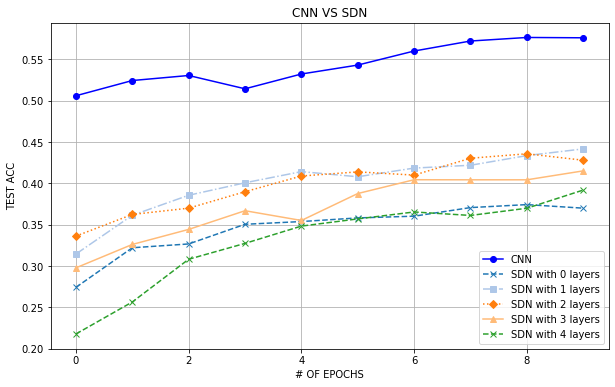

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.xlabel('# OF EPOCHS')
plt.ylabel('TEST ACC')
plt.title('CNN VS SDN')

# Plot the CNN accuracy
plt.plot(history_cnn.history['val_accuracy'], label='CNN', linestyle='-', marker='o', color='blue')

# Define a list of line styles and markers for the Dense models
line_styles = ['dashed', 'dashdot', 'dotted', 'solid']
markers = ['x', 's', 'D', '^']

# Loop through the Dense models and plot their accuracy
for i, num_hidden_layers in enumerate(num_hidden_layers_list):
    line_style = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    label = f'SDN with {num_hidden_layers} layers'
    color = plt.cm.tab20(i)  # Use a different color for each line
    plt.plot(history_sdn[i].history['val_accuracy'], label=label, linestyle=line_style, marker=marker, color=color)

plt.legend()
plt.grid(True)
plt.show()

## Explanation

As expected, the Convolutional Neural Network performs better than the Simple Dense Networks. The structure of CNN models allows them to learn hierarchical features from the data. The addition of convolutional layers in a model allows for weight sharing and reducing the number of parameters which helps avoid issues such as overfitting. Additionally, CNN models can become subjects to regularization. In our example, our model uses Dropout which is a common regularization technique to prevent overfitting. 

# QUESTION 2 

In [25]:
#SIGMOID
sigmoid = Sequential()
sigmoid.add(Conv2D(32, (3, 3), padding = 'same', input_shape=x_train.shape[1:]))
sigmoid.add(Activation('sigmoid'))
sigmoid.add(Conv2D(32, (3, 3)))
sigmoid.add(Activation('sigmoid'))
sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
sigmoid.add(Dropout(0.25))

sigmoid.add(Conv2D(64, (3, 3), padding = 'same'))
sigmoid.add(Activation('sigmoid'))
sigmoid.add(Conv2D(64, (3, 3)))
sigmoid.add(Activation('sigmoid'))
sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
sigmoid.add(Dropout(0.25))

sigmoid.add(Flatten())
sigmoid.add(Dense(512))
sigmoid.add(Activation('sigmoid'))
sigmoid.add(Dropout(0.5))
sigmoid.add(Dense(num_classes))
sigmoid.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
sigmoid.compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy'])

sigmoid_train = sigmoid.fit(x_train, y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  shuffle=True)

Epoch 1/10
98/98 [==============================] - 107s 1s/step - loss: 2.3832 - accuracy: 0.1035 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 113s 1s/step - loss: 2.3072 - accuracy: 0.0999 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 109s 1s/step - loss: 2.3044 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 119s 1s/step - loss: 2.3037 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 109s 1s/step - loss: 2.3037 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 110s 1s/step - loss: 2.3033 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
98/98 [==============================] - 106s 1s/step - loss: 2.3035 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/10
98

In [ ]:
#RELU
relu = Sequential()
relu.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
relu.add(Activation('relu'))
relu.add(Conv2D(32, (3, 3)))
relu.add(Activation('relu'))
relu.add(MaxPooling2D(pool_size=(2, 2)))
relu.add(Dropout(0.25))

relu.add(Conv2D(64, (3, 3), padding='same'))
relu.add(Activation('relu'))
relu.add(Conv2D(64, (3, 3)))
relu.add(Activation('relu'))
relu.add(MaxPooling2D(pool_size=(2, 2)))
relu.add(Dropout(0.25))

relu.add(Flatten())
relu.add(Dense(512))
relu.add(Activation('relu'))
relu.add(Dropout(0.5))
relu.add(Dense(num_classes))
relu.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
relu.compile(loss='categorical_crossentropy',
                      optimizer=opt,
                      metrics=['accuracy'])

relu_train = relu.fit(x_train, y_train,
                                  batch_size=batch_size,
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  shuffle=True)

Epoch 1/10
98/98 [==============================] - 102s 1s/step - loss: 2.1140 - accuracy: 0.2160 - val_loss: 1.9048 - val_accuracy: 0.3310
Epoch 2/10
98/98 [==============================] - 105s 1s/step - loss: 1.8572 - accuracy: 0.3278 - val_loss: 1.7423 - val_accuracy: 0.3815
Epoch 3/10
98/98 [==============================] - 97s 987ms/step - loss: 1.7455 - accuracy: 0.3689 - val_loss: 1.6459 - val_accuracy: 0.4118
Epoch 4/10
98/98 [==============================] - 103s 1s/step - loss: 1.6751 - accuracy: 0.3944 - val_loss: 1.5850 - val_accuracy: 0.4286
Epoch 5/10
98/98 [==============================] - 105s 1s/step - loss: 1.6201 - accuracy: 0.4134 - val_loss: 1.5285 - val_accuracy: 0.4517
Epoch 6/10
85/98 [=========================>....] - ETA: 12s - loss: 1.5746 - accuracy: 0.4310

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training accuracy for ReLU and Sigmoid
ax.plot(sigmoid_train.history['accuracy'], label='Sigmoid', linestyle='dashed', marker='o', color='orange')
ax.plot(relu_train.history['accuracy'], label='ReLU', linestyle='dotted', marker='x', color='blue')


# Set labels and title
ax.set_xlabel('# OF EPOCHS')
ax.set_ylabel('TRAIN ACC')
ax.set_title('RELU VS SIGMOID TRAIN ACC')

# Add a legend
ax.legend()

# Add a grid
ax.grid(True)

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training accuracy for ReLU and Sigmoid
ax.plot(sigmoid_train.history['val_accuracy'], label='Sigmoid', linestyle='dashed', marker='o', color='orange')
ax.plot(relu_train.history['val_accuracy'], label='ReLU', linestyle='dotted', marker='x', color='blue')


# Set labels and title
ax.set_xlabel('# OF EPOCHS')
ax.set_ylabel('TRAIN ACC')
ax.set_title('RELU VS SIGMOID VALIDATION ACC')

# Add a legend
ax.legend()

# Add a grid
ax.grid(True)

# Show the plot
plt.show()

In [ ]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
scores = sigmoid_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

## Explanation

When comparing the performance between the ReLu model and the Sigmoid model, we can see that the ReLu model performs better. This is not surprising, taking into consideration that ReLu is generally considered a better choice when it comes to image classification tasks. The primary explanation for that is that the properties of ReLU  such as the avoidance of vanishing gradients enable the neural network to learn and represent image features more effectively, leading to higher classification accuracy.

# QUESTION 3

## No Dropout, No Data Augmentation

In [ ]:
batch_size = 512
num_classes = 10
epochs = 25
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model_1_train_nda = model_1.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
 model_1_train = model_1.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

## Dropout, Data Augmentation

In [ ]:
batch_size = 512
num_classes = 10
epochs = 25
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model_2_train_nda = model_2.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model_2_train = model_2.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

## No Dropout, Data Augmentation

In [ ]:
batch_size = 512
num_classes = 10
epochs = 25 
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_3.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model_3.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model_3_train = model_3.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs, #add callback callbacks=[callback]
            validation_data=(x_test, y_test),
            workers=4)

## Dropout, No Data Augmentation

In [ ]:
batch_size = 512
num_classes = 10
epochs = 25 
data_augmentation = False 
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_4.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
  print('Not using data augmentation.')
  model_4_train_nda = model_4.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model_4_train = model_4.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

In [ ]:
 #Plotting the validation accuracy comparison between models
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison (Question 3)')

plt.plot(model_2_train.history['val_accuracy'], label='With Data Augmentation, With Drop Off', linestyle='dashed', marker='o')
plt.plot(model_3_train.history['val_accuracy'], label='With Data Augmentation, With Drop Off', linestyle='dashed', marker='o')
plt.plot(model_1_train_nda.history['val_accuracy'], label='Without Data Augmentation, Without Drop Off', linestyle='dashed', marker='o')
plt.plot(model_4_train_nda.history['val_accuracy'], label='Without Data Augmentation, With Drop Off', linestyle='dashed', marker='o')

plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel('# OF EPOCHS')
plt.ylabel('TRAIN ACC')
plt.title('ACCURACY GRAPH')

plt.plot(model_1_train_nda.history['accuracy'], label='NO DROPOUT, NO DATA AUG', linestyle='-', marker='o')
plt.plot(model_2_train.history['accuracy'], label='DATA AUG, DROPOUT', linestyle='--', marker='s')
plt.plot(model_3_train.history['accuracy'], label='DATA AUG, NO DROPOUT', linestyle='-.', marker='^')
plt.plot(model_4_train_nda.history['accuracy'], label='NO DATA AUG, DROPOUT', linestyle=':', marker='D')

plt.legend()
plt.grid()
plt.show()

## Explanation

From the graphs we can easily observe the better performance of models in the training section in the absence of data augmentation or dropout. This is very consistent with theory since data augmentation and dropout introduce a level of randomness and regularization that can make training more challenging in the early epochs. However, training accuracy does not necessarily show model performance. In order to capture the true level of performance we need to examine the test data where data augmentation and drop off are expected to boost our performance 